## Heart Failure Prediction

Medical Real world Problem Statement : 

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17,9 million lives each year, which acocunt for 31% of all deaths worldwide. Hearth failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.

If you're able to make a machine learning model, then this will help in early detection and people can be saved.

You have to predict a person death event using some features:- 

- Age, Gender, bloold pressure, smoke, diabetes, ejection fraction, creatinine phosphokinase, serum_creatinine, serum_sodium, time

Dataset link : - https://www.kaggle.com/andrewmvd/heart-failure-clinical-data 

##### Loading and exploring Data

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data=pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [4]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [6]:
print('Shape of the data :-', data.shape)

Shape of the data :- (299, 13)


In [8]:
print('Information about data :- ')
data.info()

Information about data :- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage:

In [11]:
print('Description about data :- ')
data.describe().T

Description about data :- 


,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [12]:
print(f'No. of Null Values :-')
data.isnull().sum()

No. of Null Values :-


age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

##### Exploratory data analysis

Total No. Of Living Cases :- 203
Total No. Of Died Cases :- 96


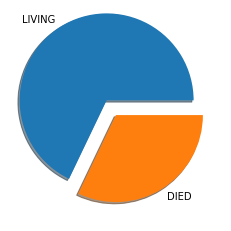

In [13]:
# Seeing the distribution of classes, this will help us to identify which types 
len_live=len(data['DEATH_EVENT'][data.DEATH_EVENT==0])
len_death=len(data['DEATH_EVENT'][data.DEATH_EVENT==1])

arr=np.array([len_live, len_death])
labels=['LIVING','DIED']
print('Total No. Of Living Cases :-', len_live)
print('Total No. Of Died Cases :-', len_death)

plt.pie(arr, labels=labels, explode=[0.2,0.0], shadow=True)
plt.show()

#inference : - we are actually working on imbalance data
# imbalance : - your data is not equally distributed between classes, this can lead biase

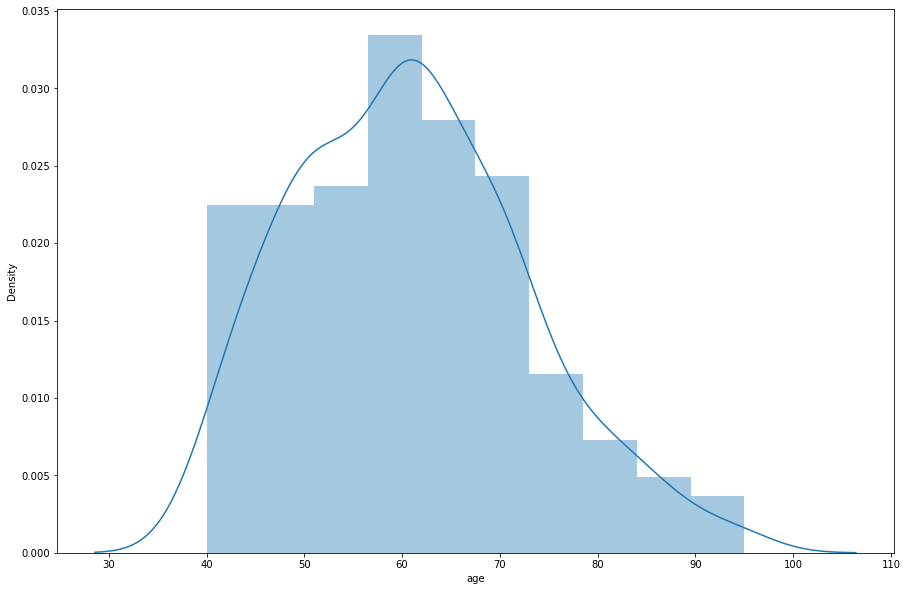

In [18]:
# Seeing the distribution of Age
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(15,10))
sns.distplot(data['age'])
plt.show()

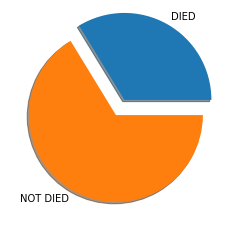

Total No. Of Living Cases :- 167
Total No. Of Died Cases :- 85


In [20]:
# Selecting columns that are above age 50 and seeing died or not 
age_above_50_not_died=data['DEATH_EVENT'][data.age >=50][data.DEATH_EVENT==0]
age_above_50_died=data['DEATH_EVENT'][data.age >=50][data.DEATH_EVENT==1]

len_not_died=len(age_above_50_not_died)
len_died=len(age_above_50_died)

arr1=[len_died, len_not_died]
labels=['DIED','NOT DIED']

plt.pie(arr1, labels=labels, explode=[0.2,0.0], shadow=True)
plt.show()

print('Total No. Of Living Cases :-', len_not_died)
print('Total No. Of Died Cases :-', len_died)
# inference in most of the cases people aged above 50 not died but accordinly if your compare 
# with above
# plot you will be seeing that died ration is comparitively higher here

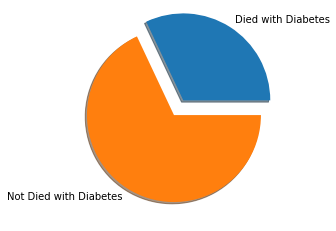

Total No. Of Living Cases with Diabetes :- 85
Total No. Of Died Cases with Diabetes:- 40


In [23]:
patient_nhave_diabetes_0=data['DEATH_EVENT'][data.diabetes==1][data.DEATH_EVENT==0]
patient_have_diabetes_1=data['DEATH_EVENT'][data.diabetes==1][data.DEATH_EVENT==1]

len_d_died=len(patient_have_diabetes_1)
lend_d_alive=len(patient_nhave_diabetes_0)

arr2=[len_d_died, lend_d_alive]
labels=['Died with Diabetes','Not Died with Diabetes']
plt.pie(arr2, labels=labels, explode=[0.2, 0.0], shadow=True)
plt.show()

print('Total No. Of Living Cases with Diabetes :-', lend_d_alive)
print('Total No. Of Died Cases with Diabetes:-', len_d_died)
#Inference :- Here you can see the that the most of the person are alive who have diabetes

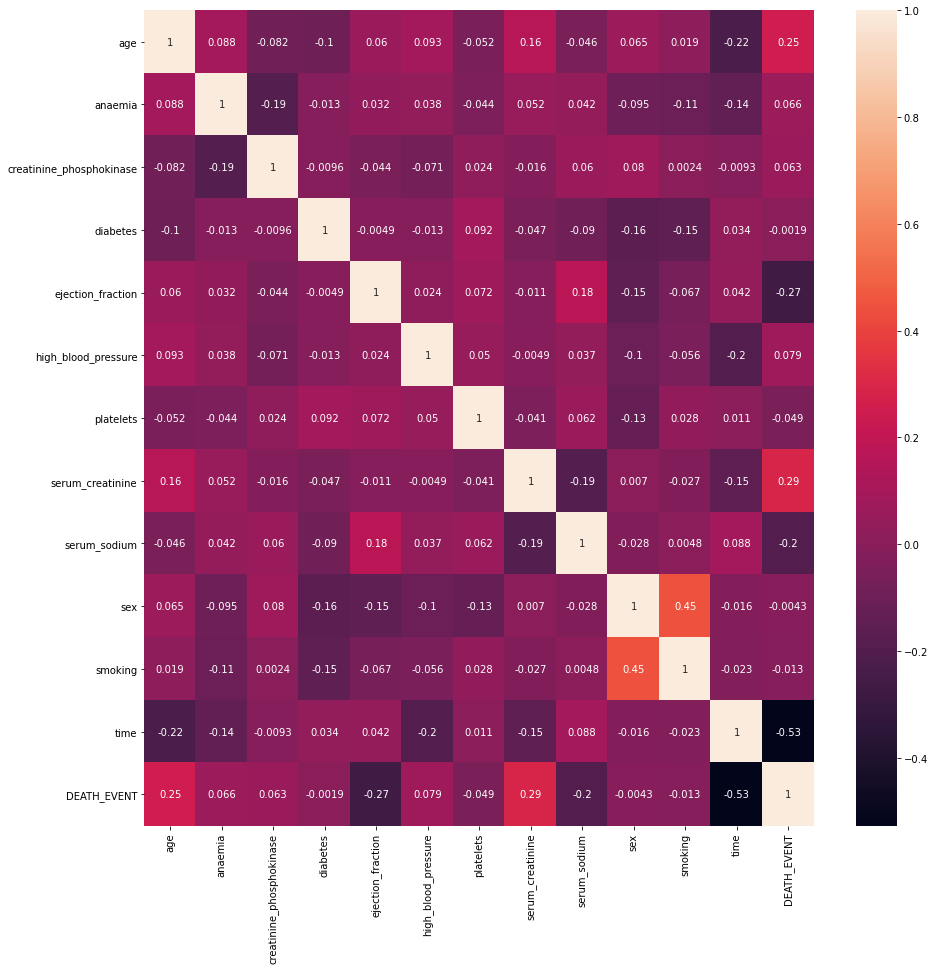

In [25]:
# Checking the correlation of our variable 
corr=data.corr()
plt.subplots(figsize=(15,15))
sns.heatmap(corr, annot=True)
plt.show()

In [29]:
# you can do the same as here 
data.corr().style.background_gradient(cmap='coolwarm')

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


#### Dataset development

In [31]:
from sklearn.model_selection import train_test_split
X=data.drop('DEATH_EVENT', axis=1)
y=data['DEATH_EVENT']

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=0)
print('Shape of the X_train', X_train.shape)
print('Shape of the y_train', y_train.shape)
print('Shape of the X_test',X_test.shape)
print('Shape of the y_test', y_test.shape)

Shape of the X_train (209, 12)
Shape of the y_train (209,)
Shape of the X_test (90, 12)
Shape of the y_test (90,)


#### Feature Engineering

Now, we will do feature engineering, we will add interaction terms, interactions terms are the product of two features, so below is the function prepared for interactions terms.

In [34]:
def add_interactions(X):
    features=X.columns
    m=len(features)
    X_int=X.copy(deep=True)
    
    for i in range(m):
        
        feature_i_name=features[i]
        
        feature_i_data=X[feature_i_name]
        
        for j in range(i+1, m):
            
            feature_j_name=features[j]
            feature_j_data=X[feature_j_name]
            feature_i_j_name=feature_i_name+"_x_"+feature_j_name
            X_int[feature_i_j_name]=feature_i_data*feature_j_data
        
        return X_int

x_train_mod=add_interactions(X_train)
x_test_mod=add_interactions(X_test)

In [35]:
#Check 
x_train_mod

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,...,age_x_creatinine_phosphokinase,age_x_diabetes,age_x_ejection_fraction,age_x_high_blood_pressure,age_x_platelets,age_x_serum_creatinine,age_x_serum_sodium,age_x_sex,age_x_smoking,age_x_time
281,70.0,0,582,0,40,0,51000.0,2.7,136,1,...,40740.0,0.0,2800.0,0.0,3570000.0,189.0,9520.0,70.0,70.0,17500.0
44,60.0,1,588,1,60,0,194000.0,1.1,142,0,...,35280.0,60.0,3600.0,0.0,11640000.0,66.0,8520.0,0.0,0.0,1980.0
241,65.0,0,582,1,30,0,249000.0,1.3,136,1,...,37830.0,65.0,1950.0,0.0,16185000.0,84.5,8840.0,65.0,65.0,13780.0
189,40.0,0,244,0,45,1,275000.0,0.9,140,0,...,9760.0,0.0,1800.0,40.0,11000000.0,36.0,5600.0,0.0,0.0,6960.0
152,50.0,0,115,0,45,1,184000.0,0.9,134,1,...,5750.0,0.0,2250.0,50.0,9200000.0,45.0,6700.0,50.0,50.0,5900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,55.0,0,572,1,35,0,231000.0,0.8,143,0,...,31460.0,55.0,1925.0,0.0,12705000.0,44.0,7865.0,0.0,0.0,11825.0
192,50.0,1,121,1,40,0,260000.0,0.7,130,1,...,6050.0,50.0,2000.0,0.0,13000000.0,35.0,6500.0,50.0,0.0,8750.0
117,85.0,1,102,0,60,0,507000.0,3.2,138,0,...,8670.0,0.0,5100.0,0.0,43095000.0,272.0,11730.0,0.0,0.0,7990.0
47,60.0,0,582,1,38,1,451000.0,0.6,138,1,...,34920.0,60.0,2280.0,60.0,27060000.0,36.0,8280.0,60.0,60.0,2400.0


#### Model Building

In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

def evaluating_model(y_test, y_pred):
    '''
    Function for evaluating our models.
    '''
    print('Accuracy Score : - ', accuracy_score(y_test, y_pred))
    print('Precision Score : -', precision_score(y_test, y_pred))
    print('Recall Score :-', recall_score(y_test, y_pred))
    print('Confusion Matrix :- \n', confusion_matrix(y_test, y_pred))

In [37]:
# Building logistic regression model a baseline model 
from sklearn.linear_model import LogisticRegression

lr_clf=LogisticRegression(max_iter=1000) # with max iterations 1000
lr_clf.fit(X_train, y_train)
lr_clf_pred=lr_clf.predict(X_test)

In [38]:
y_pred=lr_clf.predict(X_test)
evaluating_model(y_test,y_pred)

Accuracy Score : -  0.7888888888888889
Precision Score : - 0.7647058823529411
Recall Score :- 0.4642857142857143
Confusion Matrix :- 
 [[58  4]
 [15 13]]


In [40]:
#Building logistic regression with StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

lr_clf_pip=make_pipeline(StandardScaler(), LogisticRegression())
lr_clf_pip.fit(X_train, y_train)

y_pred1=lr_clf_pip.predict(X_test)
evaluating_model(y_test, y_pred1)

Accuracy Score : -  0.8111111111111111
Precision Score : - 0.7894736842105263
Recall Score :- 0.5357142857142857
Confusion Matrix :- 
 [[58  4]
 [13 15]]


In [42]:
#Hyperameterization - Fine Tunning (GridSearchCV)
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

#Defining parameter range
param_grid={'C':[0.1, 1, 10, 100, 1000],
           'gamma':[1, 0.1, 0.01, 0.001, 0.0001],
           'kernel':['rbf']}
grid=GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.0

[CV 4/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 3/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 4/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 5/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 1/5] END ................C=1000, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 2/5] END ................C=1000, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 3/5] END ................C=1000, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 4/5] END ................C=1000, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 5/5] END ................C=1000, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 1/5] END ...............

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [43]:
grid.best_estimator_

SVC(C=10, gamma=0.0001)

In [45]:
svc=SVC(C=10, gamma=0.0001)
svc.fit(X_train,y_train)
y_pred2=svc.predict(X_test)
evaluating_model(y_test,y_pred2)

Accuracy Score : -  0.6777777777777778
Precision Score : - 0.4
Recall Score :- 0.07142857142857142
Confusion Matrix :- 
 [[59  3]
 [26  2]]


In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

def randomized_search(params, runs=20, clf=DecisionTreeClassifier(random_state=2)):
    rand_clf=RandomizedSearchCV(clf, params, n_iter=runs, cv=5, n_jobs=-1, random_state=2)
    rand_clf.fit(X_train, y_train)
    best_model=rand_clf.best_estimator_
    best_score=rand_clf.best_score_
    
    print('Training score :{:.3f}'.format(best_score))
    y_pred=best_model.predict(X_test)
    accuracy=accuracy_score(y_test, y_pred)
    print('Test score :{:.3f}'.format(accuracy))
    
    return best_model

randomized_search(params={'criterion':['entropy','gini'],
                          'splitter':['random','best'],
                          'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075, 0.01],
                          'min_samples_split':[2, 3, 4, 5, 8, 10],
                          'min_impurity_decrease':[0.0, 0.0005, 0.005, 0.05, 0.10, 0.15, 0.2],
                          'max_leaf_nodes':[10, 15, 20, 25, 30, 35, 40, 45, 50, None],
                          'max_features':['auto', 0.95, 0.90, 0.85, 0.80, 0.75, 0.70],
                          'max_depth':[None, 2, 4, 6, 8],
                          'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075, 0.01, 0.05]
                         })

Training score :0.842
Test score :0.856


DecisionTreeClassifier(criterion='entropy', max_features=0.7, max_leaf_nodes=35,
                       min_impurity_decrease=0.2, min_weight_fraction_leaf=0.01,
                       random_state=2)

In [48]:
ds_clf=DecisionTreeClassifier(max_depth=8, max_features=0.9, max_leaf_nodes=30,
                              min_impurity_decrease=0.05, min_samples_leaf=0.02,
                              min_samples_split=10,min_weight_fraction_leaf=0.005,
                              random_state=2, splitter='random')
ds_clf.fit(X_train, y_train)
pred4=ds_clf.predict(X_test)
evaluating_model(y_test, pred4)

Accuracy Score : -  0.8111111111111111
Precision Score : - 0.72
Recall Score :- 0.6428571428571429
Confusion Matrix :- 
 [[55  7]
 [10 18]]


In [49]:
from sklearn.ensemble import RandomForestClassifier

randomized_search(params={
                          'min_samples_leaf':[1,2,4,6,8,10,20,30],
                          'min_impurity_decrease':[0.0, 0.01, 0.05, 0.10, 0.15, 0.2],
                          'max_features':['auto', 0.8, 0.7, 0.6, 0.5, 0.4],
                           'max_depth':[None,2,4,6,8,10,20], 
}, clf=RandomForestClassifier(random_state=2))

Training score :0.847
Test score :0.867


RandomForestClassifier(max_depth=2, max_features=0.5,
                       min_impurity_decrease=0.01, min_samples_leaf=10,
                       random_state=2)

In [50]:
rf_clf=RandomForestClassifier(max_depth=2, max_features=0.5,
                       min_impurity_decrease=0.01, min_samples_leaf=10,
                       random_state=2)

rf_clf.fit(X_train, y_train)
pred5=rf_clf.predict(X_test)
evaluating_model(y_test, pred5)

Accuracy Score : -  0.8666666666666667
Precision Score : - 0.9
Recall Score :- 0.6428571428571429
Confusion Matrix :- 
 [[60  2]
 [10 18]]


###### XGBOOST

Description

XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way. The same code runs on major distributed environment (Hadoop, SGE, MPI) and can solve problems beyond billions of examples.

In [52]:
from xgboost import XGBClassifier
xgb1=XGBClassifier(colsample_bytree=1.0,
                  learning_rate=0.1,
                  max_depth=4,
                  n_estimators=400,
                  subsample=1.0)

eval_set=[(X_test, y_test)]
xgb1.fit(X_train, y_train, early_stopping_rounds=10, eval_metric='logloss', eval_set=eval_set,
        verbose=True)

[0]	validation_0-logloss:0.63929
[1]	validation_0-logloss:0.59762
[2]	validation_0-logloss:0.56422
[3]	validation_0-logloss:0.53183
[4]	validation_0-logloss:0.50465
[5]	validation_0-logloss:0.48130
[6]	validation_0-logloss:0.46135
[7]	validation_0-logloss:0.44722
[8]	validation_0-logloss:0.43508
[9]	validation_0-logloss:0.42311
[10]	validation_0-logloss:0.40869
[11]	validation_0-logloss:0.39828
[12]	validation_0-logloss:0.39094
[13]	validation_0-logloss:0.38522
[14]	validation_0-logloss:0.37836
[15]	validation_0-logloss:0.37250
[16]	validation_0-logloss:0.36963
[17]	validation_0-logloss:0.36676
[18]	validation_0-logloss:0.36467
[19]	validation_0-logloss:0.36335
[20]	validation_0-logloss:0.36152
[21]	validation_0-logloss:0.36137
[22]	validation_0-logloss:0.35676
[23]	validation_0-logloss:0.35485
[24]	validation_0-logloss:0.35313
[25]	validation_0-logloss:0.34993
[26]	validation_0-logloss:0.34873
[27]	validation_0-logloss:0.34697
[28]	validation_0-logloss:0.34448
[29]	validation_0-loglos

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1.0,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [53]:
pred6=xgb1.predict(X_test)
evaluating_model(y_test, pred6)

Accuracy Score : -  0.8555555555555555
Precision Score : - 0.8
Recall Score :- 0.7142857142857143
Confusion Matrix :- 
 [[57  5]
 [ 8 20]]


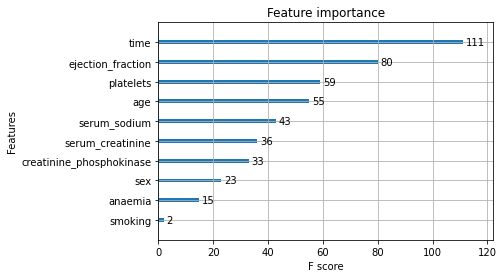

In [54]:
from xgboost import plot_importance
# xgb feature_importances_
plot_importance(xgb1)
plt.show()

In [55]:
from sklearn.ensemble import GradientBoostingClassifier

gbdt=GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=1, 
                               random_state=0)

gbdt.fit(X_train, y_train)

pred_gdbt=gbdt.predict(X_test)
evaluating_model(y_test, pred_gdbt)

Accuracy Score : -  0.8555555555555555
Precision Score : - 0.8571428571428571
Recall Score :- 0.6428571428571429
Confusion Matrix :- 
 [[59  3]
 [10 18]]


#### Choosing the best model and saving them

In [56]:
# We will chose XGboost
import joblib
joblib.dump(xgb1,'model.pkl')
model=joblib.load('model.pkl')
model.predict(X_test)

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])